In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import matplotlib as mpl

# Task 1

Дан массив. Необходимо создать новый массив, состоящий из элементов массива arr, которые больше среднего значения элементов массива arr.

In [2]:
arr = np.array([134, 70, 85, 43, 14, 1000, 23, 75])

In [3]:
# место для решения
mean_arr = np.mean(arr)
new_arr = np.empty(0)

for i in arr:
  if i > mean_arr:
    new_arr = np.append(new_arr, i)
  else:
    continue

print("Исходный массив arr =", arr)
print("Среднее значение элементов массива arr =", mean_arr)
print("Новый массив new_arr =", new_arr)



Исходный массив arr = [ 134   70   85   43   14 1000   23   75]
Среднее значение элементов массива arr = 180.5
Новый массив new_arr = [1000.]


# Task 2

Заполни пропуски в коде и реши задачу:

Исследователь хочет проверить, есть ли связь между количеством часов, проведенных за компьютером, и уровнем зрения у подростков. Для этого он собрал данные о 100 подростках, измерив количество часов, проведенных за компьютером, и уровень зрения каждого из них. Корреляция между этими двумя переменными составила 0.3. Необходимо проверить, является ли эта связь статистически значимой.

Шаг 1: Формулируем нулевую и альтернативную гипотезы:

H0: Нет связи между между часами за компьютером и уровнем зрения подростков

H1: Время (кол-во часов), которые подростоки проводят за компьютером влияет на их уровень зрения

Шаг 2: Вычисляем коэффициент корреляции Пирсона (есть в условии задачи):

In [4]:
r = 0.3

Шаг 3: Определяем степень свободы (ориентируйся на количество измерений):

In [5]:
df = 100

Шаг 4: Находим критическое значение t_crit для уровня значимости α = 0.05 и степеней свободы df, найденных на предыдущем шаге:

In [6]:
α = 0.05
t_crit = scipy.stats.t.ppf(1 - α / 2, df)
t_crit

1.9839715184496334

Шаг 5: Вычисляем статистическую значимость корреляции по формуле [![\\  t = r*\sqrt{\frac{df}{1-{r^{2}}}}](https://latex.codecogs.com/svg.latex?%5C%5C%20%20t%20%3D%20r*%5Csqrt%7B%5Cfrac%7Bdf%7D%7B1-%7Br%5E%7B2%7D%7D%7D%7D)](#_)

In [7]:
t = r * np.sqrt(df / (1 - pow(r, 2)))
t

3.1448545101657546

Шаг 6: Сравниваем полученное значение t с критическим значением tкрит, |t| > tкрит:

In [10]:
if abs(t) > t_crit:
    print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу')

Отвергаем нулевую гипотезу


Шаг 7: Делаем выводы:

In [11]:
# запиши вывод:
print("Время (количество часов), которое подростки проводят за компьютером - оказывает влиение на уровень зрения (Существует статстически значимая связь)")

Время (количество часов), которое подростки проводят за компьютером - оказывает влиение на уровень зрения (Существует статстически значимая связь)


# Task 3

Отдел маркетинга хочет расширить бюджет закупки рекламы у блогеров и собрал некоторое количество коммерческих предложений. Так как конкретный регламент или стандарт на ценообразование отсутствует, нам необходимо определить, какие из предложений находятся в среднем ценовом диапазоне, а какие сильно завышены или занижены. 

Порядок решения:
- визуализировать респределение с ценами в виде boxplot
- рассчитать интервартильный размах iqr
- вывести точки, которые выходят за диапазон ±iqr

In [13]:
prices = np.array([100000, 120000, 500000, 130000, 140000, 150000, 400000, 
                        160000, 170000, 180000, 190000, 200000, 300000, 600000])
import seaborn as sns

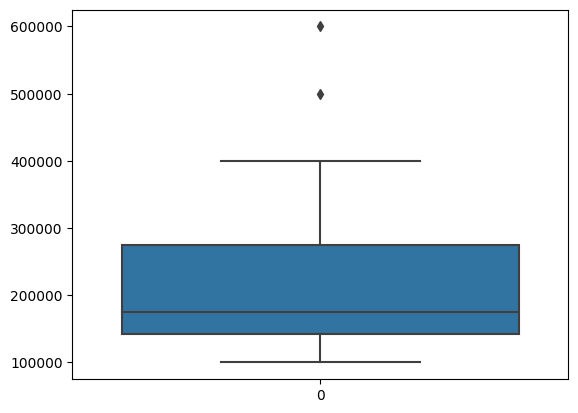

интервартильный размах iqr = 132500.0
точки, которые выходят за диапазон ±iqr = [500000, 600000]


In [16]:
# место для решения
from scipy.stats import iqr
sns.boxplot(prices)
plt.show()

q1 = np.quantile(prices, 0.25)
q3 = np.quantile(prices, 0.75)
iqr = q3 - q1
print("интервартильный размах iqr =", iqr)

down_line = np.percentile(prices, 25) - 1.5 * iqr
up_line = np.percentile(prices, 75) + 1.5 * iqr
leave_iqr = [price for price in prices if price < down_line or price > up_line]
leave_iqr
print("точки, которые выходят за диапазон ±iqr =", leave_iqr)

# Task 4

Имеется датасет, в котором собраны антропометрические измерения для 716 респондентов разного пола и возраста. Мы хотим использовать его, чтобы составить размерную сетку для производства детской хоккейной формы. Но не можем определиться, стоит ли делать лекала отдельно для девочек и мальчиков. Для этого необходимо вычислить доверительные интервалы на 4 основных измерения и выяснить, есть ли между ними стат. значимые. различия. Если хотя бы для одного из измерений будут значимые различия - отдаем в разработку 2 вида лекал. 

Порядок решения:

- выделить из датасета группу респондентов в возрасте 10-12 лет;
- поделить на девочек и мальчиков (Male = 1, Female = 2);
- перевести измерения ['TotalHeight', 'ShoulderWidth', 'Waist', 'Hips'] в сантиметры;
- построить гистограммы распределений для всех 4 измерений в сетке 2х2, на каждом графике должны быть отображены и мальчики, и девочки;
- вычислить и вывести 95% доверительный интервал для каждого из измерений;
- вычислить и вывести значение p-value для каждого из измерений;
- записать общий вывод: нужно ли разрабатывать отдельные лекала?

In [17]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


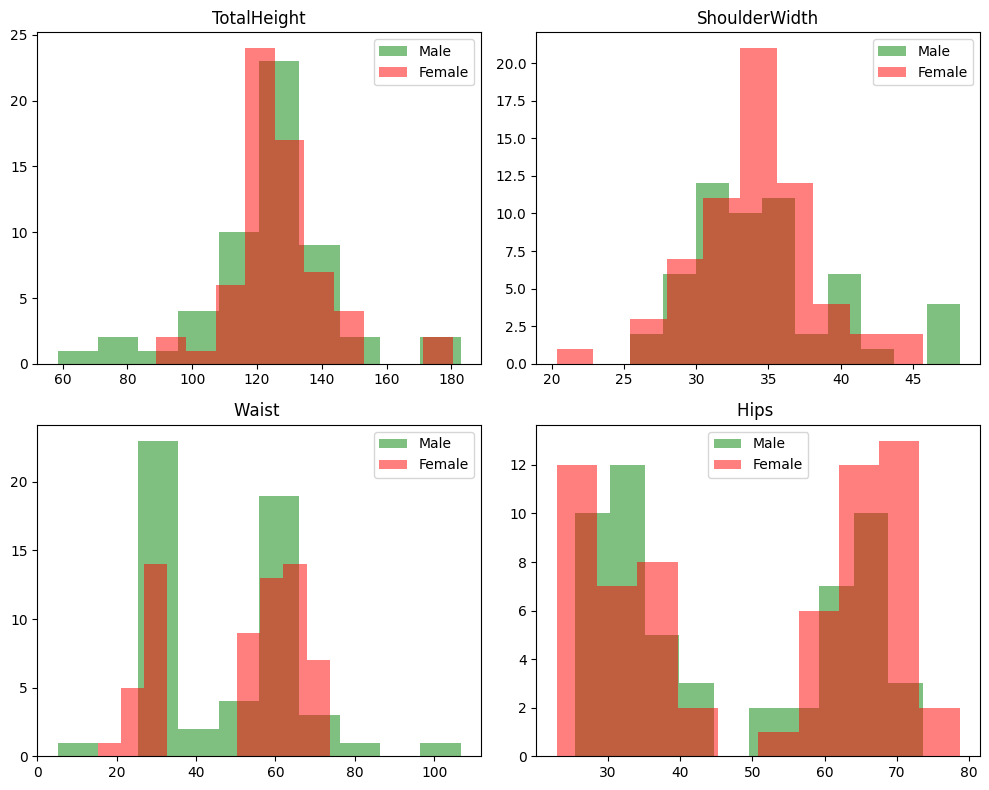

Доверительный интервал для TotalHeight
 Мальчики: (117.73963105153288, 129.8633319114301) 
 Девочки: (122.95299570187672, 130.64382969494872) 
 P-value для  TotalHeight : 0.3956943477471464 
 Нет статистически значимых различий 

Доверительный интервал для ShoulderWidth
 Мальчики: (32.93020001241473, 36.02609628388157) 
 Девочки: (31.79736975070107, 34.000725487394156) 
 P-value для  ShoulderWidth : 0.09501011387699174 
 Нет статистически значимых различий 

Доверительный интервал для Waist 
 Мальчики: (41.23078011730929, 51.33810877157959) 
 Девочки: (46.801328133172504, 55.04057662873227) 
 P-value для  Waist  : 0.1566871504607796 
 Нет статистически значимых различий 

Доверительный интервал для Hips 
 Мальчики: (41.59055630942724, 50.978332579461636) 
 Девочки: (46.04320448971367, 55.15362090711173) 
 P-value для  Hips  : 0.19473597212002536 
 Нет статистически значимых различий 



In [32]:
# место для решения
pd.options.mode.chained_assignment = None
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/MyDrive/School21/Project13/datasets/project13_body_measurements.csv')
#Выделить из датасета группу респондентов в возрасте 10-12 лет;
age = data[(data['Age'] >= 10) & (data['Age'] <= 12)]
#поделить на девочек и мальчиков (Male = 1, Female = 2); Как я вижу, тут уже поделено
#перевести измерения ['TotalHeight', 'ShoulderWidth', 'Waist', 'Hips'] в сантиметры; Предполагаю, что тут дюймы
age['TotalHeight'] = age['TotalHeight'] *2.54
age['ShoulderWidth'] = age['ShoulderWidth'] *2.54
age['Waist '] = age['Waist '] *2.54
age['Hips '] = age['Hips '] *2.54
# построить гистограммы распределений для всех 4 измерений в сетке 2х2, на каждом графике должны быть отображены и мальчики, и девочки;
fig, axes = plt.subplots(2, 2, figsize = (10, 8))

axes[0,0].hist(age['TotalHeight'][age['Gender'] == 1], bins=10, alpha = 0.5, label= "Male", color = 'Green')
axes[0,0].hist(age['TotalHeight'][age['Gender'] == 2], bins=10, alpha = 0.5, label= "Female", color = 'Red')
axes[0,0].set_title('TotalHeight')
axes[0,0].legend()

axes[0,1].hist(age['ShoulderWidth'][age['Gender'] == 1], bins=10, alpha = 0.5, label= "Male", color = 'Green')
axes[0,1].hist(age['ShoulderWidth'][age['Gender'] == 2], bins=10, alpha = 0.5, label= "Female", color = 'Red')
axes[0,1].set_title('ShoulderWidth')
axes[0,1].legend()

axes[1,0].hist(age['Waist '][age['Gender'] == 1], bins=10, alpha = 0.5, label= "Male", color = 'Green')
axes[1,0].hist(age['Waist '][age['Gender'] == 2], bins=10, alpha = 0.5, label= "Female", color = 'Red')
axes[1,0].set_title('Waist ')
axes[1,0].legend()

axes[1,1].hist(age['Hips '][age['Gender'] == 1], bins=10, alpha = 0.5, label= "Male", color = 'Green')
axes[1,1].hist(age['Hips '][age['Gender'] == 2], bins=10, alpha = 0.5, label= "Female", color = 'Red')
axes[1,1].set_title('Hips ')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# вычислить и вывести 95% доверительный интервал для каждого из измерений;
parts = ['TotalHeight', 'ShoulderWidth', 'Waist ', 'Hips ']
for part in parts:
    male = age[data['Gender'] == 1][part]
    female = age[data['Gender'] == 2][part]

    male_mean = np.mean(male)
    female_mean = np.mean(female)

    male_std = np.std(male)
    female_std = np.std(female)

    male_n = len(male)
    female_n = len(female)
    #Стандартная ошибка среднего
    male_se =  male_std / np.sqrt(male_n)
    female_se =  female_std / np.sqrt(female_n)

    #Доверительный интервал
    male_ci = stats.t.interval(0.95, df=male_n - 1, loc = male_mean, scale= male_se)
    female_ci = stats.t.interval(0.95, df=female_n - 1, loc = female_mean, scale= female_se)
    #p_val
    t_stat, p_val = stats.ttest_ind(male, female)

    print(f"Доверительный интервал для {part}\n Мальчики: ({male_ci[0]}, {male_ci[1]}) \n Девочки: ({female_ci[0]}, {female_ci[1]}) \n P-value для  {part} : {p_val} \n {'Есть' if p_val < 0.05 else 'Нет'} статистически значимых различий \n")

# Дополнительное задание* 

Одним из популярных инструментов монетизации мобильных игр является реклама, за просмотр которой можно получить бонусы в игре, либо, как правило, заплатить за ее отключение. На каких уровнях расставлять рекламные интеграции и какие отдавать бонусы можно выяснить при помощи А/Б тестирования: выбрать контрольную и тестовую группы и провести на них эксперимент - одним показать рекламный ролик на 10 уровне, другим - на 25. 

Результаты подобного А/Б теста находятся в датасете к этой задаче. В нем содержатся: ID пользователя, его текущий уровень, показатели retention 7 дня и принадлежность той или иной группе. Необходимо проверить, отличаются ли значения retention 7 для этих двух групп. На каком уровне стоит показывать рекламную интеграцию?

Для решения данной задачи необходимо использовать метод bootstrap ("бутстреп") -  практический метод исследования распределений, основанный на многократной генерации выборок на базе имеющейся выборки.

**В ходе исследования необходимо:**
- построить boxplot, проверить выборку на аномалии и очистить;
- поделить выборку на группы и построить распределения игроков по уровням;
- сравнить среднее и медианное значение уровней;
- вычислить ret_7 для каждой из групп;
- сгенерировать новый датасет, который будут состоять из выборочных средних (см. описание ниже);
- вычислить среднее и 95% доверительный интервал для каждой из групп;
- нарисовать график плотности распределения средних, на котором будут отображены обе группы, их средние и доверительные интервалы;
- проверить перекрытие доверительных интервалов и сделать вывод о стат.значимости различий;
- сформулировать вывод, на каком уровне лучше показывать рекламу (метрика выше).

--

Как создать датасет с выборочными средними методом bootstrap:
1. создаем список res, в который мы будем собирать выборочные средние;
2. создаем новый датасет из случайных элементов: 
    - выбираем наугад одно наблюдение из имеющихся;
    - повторяем выбор столько раз, сколько у нас есть наблюдений (при этом некоторые из них мы выберем несколько раз, некотороые не выберем вообще — это нормально);
    - для этого можно использовать конструкцию ddf = df.sample(frac = 1, replace = True), где frac = 1 как раз означает столько раз повторять выбор, сколько есть наблюдений;
3. вычисляем среднее значение ddf.groupby('group')['ret_7'].mean() и сохраняем его в список с результатами из п.1 res.append();
4. повторяем шаги 2-3 в цикле от 500 до 1000 раз (чем больше - тем точнее, но медленнее);
5. преобразуем res в pd.DataFrame()

In [33]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/School21/Project13/datasets/project13_mobile_game_ab.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


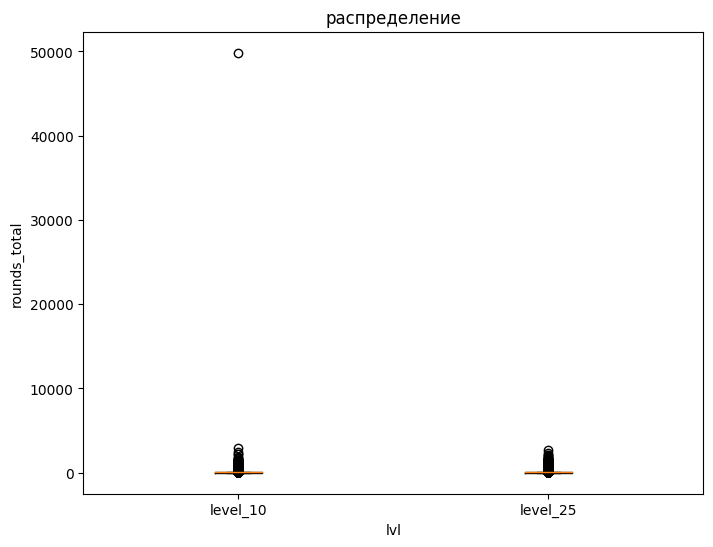

Среднее значение для группы level_10: 52.45626398210291
 Среднее значение для группы level_25: 51.29877552814966
 Медиана для группы level_10: 17.0
 Медиана для группы level_25: 16.0

Среднее значение ret_7 для группы level_10: 0.19020134228187918 
 Среднее значение ret_7 для группы level_25: 0.18200004396667327
Level 10: Mean = 0.19029111591060854 Confidence Interval = (0.1901769677017849, 0.19040526411943218) 
Level 25: Mean = 0.18202710894270882 Confidence Interval = (0.1819146149148044, 0.18213960297061324)


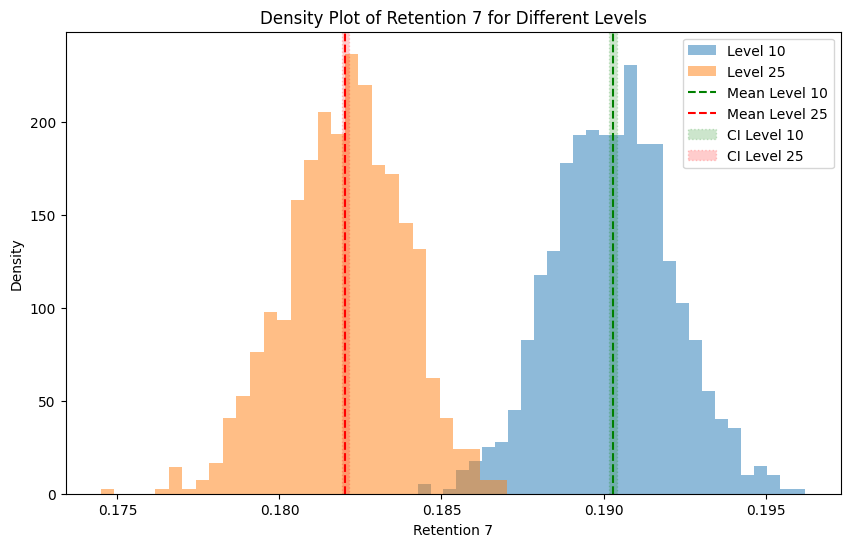

Доверительные интервалы не перекрываются.
Наблюдаются статистически значимые различия между группами.
Вывод: Среднее значение retention 7 для группы, на которой реклама была показана на уровне 10, значительно выше, чем для группы, на которой реклама была показана на уровне 25. Следовательно, там эффективнее показывать рекламу!


In [40]:
# место для решения
plt.figure(figsize=(8,6))
plt.boxplot([data[data['group'] == 'level_10']['rounds_total'], data[data['group'] == 'level_25']['rounds_total']])
plt.xticks([1,2],['level_10', 'level_25'])
plt.title('распределение')
plt.xlabel('lvl')
plt.ylabel('rounds_total')
plt.show()

#Проверка на выбросы
lvl_10_df = data[data['group'] == 'level_10']['rounds_total']
lvl_25_df = data[data['group'] == 'level_25']['rounds_total']

lvl_10_df_iqr = stats.iqr(lvl_10_df, scale='normal', nan_policy='omit')
lvl_25_df_iqr = stats.iqr(lvl_25_df,scale='normal', nan_policy='omit')

#границы выбросов
lvl_10_lower_bound = stats.scoreatpercentile(lvl_10_df, 25) - 1.5 * lvl_10_df_iqr
lvl_10_upper_bound = stats.scoreatpercentile(lvl_10_df, 75) + 1.5 * lvl_10_df_iqr

lvl_25_lower_bound = stats.scoreatpercentile(lvl_25_df, 25) - 1.5 * lvl_10_df_iqr
lvl_25_upper_bound = stats.scoreatpercentile(lvl_25_df, 75) + 1.5 * lvl_10_df_iqr

lvl_10_df_cleaned = lvl_10_df[(lvl_10_df >= lvl_10_lower_bound) & (lvl_10_df <= lvl_10_upper_bound)]
lvl_25_df_cleaned = lvl_25_df[(lvl_25_df >= lvl_25_lower_bound) & (lvl_25_df <= lvl_25_upper_bound)]

#сравнить среднее и медианное значение уровней;
lvl_10_mean = data[data['group'] == 'level_10']['rounds_total'].mean()
lvl_25_mean = data[data['group'] == 'level_25']['rounds_total'].mean()

lvl_10_median = data[data['group'] == 'level_10']['rounds_total'].median()
lvl_25_median = data[data['group'] == 'level_25']['rounds_total'].median()

print(f"Среднее значение для группы level_10: {lvl_10_mean}\n Среднее значение для группы level_25: {lvl_25_mean}\n Медиана для группы level_10: {lvl_10_median}\n Медиана для группы level_25: {lvl_25_median}\n")

#- вычислить ret_7 для каждой из групп;
ret_7_lvl_10 = data[data['group'] == 'level_10']['ret_7'].mean()
ret_7_lvl_25 = data[data['group'] == 'level_25']['ret_7'].mean()

print(f"Среднее значение ret_7 для группы level_10: {ret_7_lvl_10} \n Среднее значение ret_7 для группы level_25: {ret_7_lvl_25}")

#- сгенерировать новый датасет, который будут состоять из выборочных средних (см. описание ниже); // BOOTSTRAP
res = []
count_iterations = 1000;
for _ in range(count_iterations):
    ddf = data.sample(frac = 1, replace = True) # новый датасет путем выбора случайных элементов
    means = ddf.groupby('group')['ret_7'].mean() #Среднее ret_7 для каждой группы
    res.append(means)
bootstrap_df = pd.DataFrame(res)

bootstrap_df

# вычислить среднее и 95% доверительный интервал для каждой из групп; // Я так понял по df bootstrap
lvl_10_boots_mean = bootstrap_df['level_10'].mean() #Srednee
lvl_25_boots_mean = bootstrap_df['level_25'].mean()

ci_lvl_10 = stats.t.interval(0.95, len(bootstrap_df['level_10']), loc =lvl_10_boots_mean, scale = stats.sem(bootstrap_df['level_10']) )#Doveritel interval
ci_lvl_25 = stats.t.interval(0.95, len(bootstrap_df['level_25']), loc =lvl_25_boots_mean, scale = stats.sem(bootstrap_df['level_25']) )#Doveritel interval

print("Level 10: Mean =", lvl_10_boots_mean, "Confidence Interval =", ci_lvl_10,"\nLevel 25: Mean =", lvl_25_boots_mean, "Confidence Interval =", ci_lvl_25)

#нарисовать график плотности распределения средних, на котором будут отображены обе группы, их средние и доверительные интервалы; // Я так понимаю на основе вышеполученных данных
plt.figure(figsize=(10,6))
plt.hist(bootstrap_df['level_10'], bins= 30, density=True, alpha=0.5, label='Level 10')
plt.hist(bootstrap_df['level_25'], bins= 30, density=True, alpha=0.5, label='Level 25')
plt.axvline(lvl_10_boots_mean, color='green', linestyle='--', label='Mean Level 10')
plt.axvline(lvl_25_boots_mean, color='red', linestyle='--', label='Mean Level 25')
plt.axvspan(ci_lvl_10[0], ci_lvl_10[1], color='green',linestyle=':', alpha=0.2, label='CI Level 10')
plt.axvspan(ci_lvl_25[0], ci_lvl_25[1], color='red',linestyle=':', alpha=0.2, label='CI Level 25')
plt.xlabel('Retention 7')
plt.ylabel('Density')
plt.title('Density Plot of Retention 7 for Different Levels')
plt.legend()
plt.show()

#- проверить перекрытие доверительных интервалов и сделать вывод о стат.значимости различий;
overlap = (ci_lvl_10[0] <= ci_lvl_25[1]) and (ci_lvl_10[1] >= ci_lvl_25[0])
if overlap:
    print("Доверительные интервалы перекрываются.\nСтатистически значимых различий между группами нет.")
else:
    print("Доверительные интервалы не перекрываются.\nНаблюдаются статистически значимые различия между группами.")

print("Вывод: Среднее значение retention 7 для группы, на которой реклама была показана на уровне 10, значительно выше, чем для группы, на которой реклама была показана на уровне 25. Следовательно, там эффективнее показывать рекламу!")